<a href="https://colab.research.google.com/github/CarlosJozala/Modelo_para_Fraude_de_Credito/blob/main/Modelo_para_Detec%C3%A7%C3%A3o_de_Fraude_de_Cart%C3%A3o_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

---

Com o avanço da conectividade à internet e a disseminação generalizada do uso de smartphones, o uso de cartões de crédito para transações online tem se tornado cada vez mais comum.

Infelizmente, nesse cenário, é esperado que indivíduos mal-intencionados busquem maneiras de cometer fraudes utilizando cartões de crédito alheios, realizando compras sem autorização.

Para salvaguardar os clientes de serem cobrados por transações que não realizaram, é crucial que bancos e empresas de cartão de crédito possam identificar com precisão se uma transação em questão é fraudulenta ou legítima.

Neste projeto, empregarei algoritmos de machine learning para treinar um modelo preditivo capaz de discernir entre transações legítimas e fraudulentas. Farei uso dos classificadores **Decision Tree**, **Random Forest**, **Ada Boost** e **Gradient Boosting** da biblioteca Scikit-Learn para determinar qual destes quatro algoritmos se ajusta melhor aos nossos dados, produzindo resultados mais precisos conforme as métricas de avaliação dos modelos.

**Utilização das Bibliotecas**

In [2]:
# Utilização das Bibliotecas para exploração, análise e visualização dos dados
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px

# Biblioteca para o Processamento de dados do SKlearn
from sklearn.preprocessing import StandardScaler

# train_test_split para separar os dados em Conjuntos de Teste e Treinamento
from sklearn.model_selection import train_test_split

# Métricas de avaliação dos modelos

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Algoritmos

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# Configurando seaborn
sns.set_theme(context = 'notebook', style='darkgrid',palette='muted')

**Carregando os Dados**

In [3]:
# Importando dados
df = pd.read_csv('creditcard.csv')
# Visualizando dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# **Conhecendo o Conjunto de Dados**

As informações fornecidas derivam do conjunto de dados [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), disponibilizado no Kaggle. O conjunto de dados compreende transações de cartões de crédito realizadas por clientes europeus ao longo de um período de dois dias em setembro de 2013.

Os dados incluem as seguintes variáveis: 'time', que indica o intervalo de tempo em segundos desde a primeira transação; 'amount', que indica o valor da transação em euros; e 'class', que denota se a transação é fraudulenta ou legítima, sendo 1 para fraude e 0 para transações genuínas.

As variáveis de V1, V2, V3.. a V28 passaram por uma técnica de análise de componentes principais, e seus detalhes específicos não foram divulgados devido à confidencialidade das informações subjacentes.

**Tipos de Dados Presentes no DataSet**

In [5]:
# Verificando os tipos de dados presentes no dataset
df.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

*O conjunto de dados inclui exclusivamente atributos numéricos, predominantemente representados por valores de ponto flutuante (float), enquanto somente a variável 'class' é composta por números inteiros (int).*

In [40]:
#Limpeza Prévia de dados NaN que Haviam
df.dropna(inplace=True)

In [38]:
# Verifica se há dados nulos no dataset
df.isna().values.any()

False

In [7]:
# Dados estatísticos acerca dos valores de transação
df.Amount.describe().round(2)

count    9964.00
mean       62.97
std       184.63
min         0.00
25%         5.00
50%        15.95
75%        50.79
max      7712.43
Name: Amount, dtype: float64

**75%** das transações registradas no período foram de até **€50,79**

O valor máximo registrado no período foi de **€7.712,43**. Bem acima da média de **€62,97.**

In [12]:
# Visualizando a distribuição dos valores de transação
fig = px.scatter(df, x = 'Amount', y =df.index, color = df.Class,
                title = 'Distribuição de Valores de Transação')
fig.update_layout(xaxis_title='Valores de Transação (em €)',
                    yaxis_title='Quantidade')
fig.show()

Parece que a maioria das transações no conjunto de dados são legítimas, como pode ser observado no gráfico acima, onde são representadas pelos pontos azuis. Além disso, é evidente que as transações de valores mais elevados não foram fraudulentas e que não houve nenhuma fraude em transações acima de **€1.000,00**.

No entanto, identificar visualmente as transações fraudulentas, indicadas pelos pontos amarelos, é um desafio no gráfico. Isso levanta a questão: Quantas transações foram identificadas como fraudulentas no conjunto de dados?



**Distribuição das Classes**

In [16]:
# Visualizing Class distribution
fig = px.pie(df.Class,values = df.Class.value_counts(),
             names=['Genuínas', 'Fraude'], title='Distribuição de Transações Genuínas e Fraudulentas')
fig.show()

In [17]:
df.Class.value_counts()

0.0    9926
1.0      38
Name: Class, dtype: int64

Parece que apenas 38 transações do dataset foram fraudulentas, o que representa 0,38% dos dados. Existe um enorme desbalanceamento de classe para lidarmos neste projeto! Vamos ver algumas estatísticas a respeito dos valores das transações fraudulentas.

Vamos ver algumas estatísticas a respeito dos valores das transações fraudulentas.



In [18]:
df.query("Class ==1").Amount.describe()

count      38.000000
mean       75.730526
std       304.521215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

**75%** das fraudes foram abaixo do valor de **€1000,00** e o maior valor registrado de fraude foi de **€1.809,60**. Vamos ver estes valores distribuídos em um gráfico!



In [19]:
# Distribuição de valores de transações fraudulentas
fig = px.scatter(df.query("Class==1"), x = 'Amount', y =df.query("Class==1").index,
                title = 'Distribuição de Valores de Transações Fraudulentas')
fig.update_layout(xaxis_title='Valor da Transação (em €)',
                    yaxis_title='Transações')
fig.show()

# **Preparação dos Dados**

Neste projeto, vamos descartar o atributo 'time', já que não será utilizado em nossa análise.

Além disso, vamos aplicar o método StandardScaler() para padronizar os dados do atributo 'amount' em uma escala semelhante à dos outros atributos. Isso garante que nossos modelos não atribuam acidentalmente um peso maior a essa variável

In [20]:
df = df.drop(columns = ['Time'], axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,1.286884,-0.124610,0.148283,-0.259343,0.248357,0.896718,-0.626627,0.227693,1.618678,-0.395130,...,-0.381864,-0.904515,-0.027985,-1.743540,0.090885,0.870425,-0.084116,-0.022744,12.18,0.0
9961,1.318742,0.496408,0.114876,0.695262,0.170133,-0.537180,0.025492,-0.272931,1.267298,-0.672796,...,-0.484943,-1.111176,0.028259,-0.549934,0.328634,0.106061,-0.046154,0.017304,1.78,0.0
9962,1.241757,0.419587,0.806183,0.894811,-0.507886,-1.118126,0.018908,-0.343335,1.210781,-0.455321,...,-0.379396,-0.817785,0.181425,0.662879,0.172535,0.033636,-0.051084,0.017208,1.29,0.0
9963,1.304800,-0.052885,0.415235,-0.081725,-0.223525,0.097752,-0.561240,0.067228,1.617203,-0.342078,...,-0.379597,-0.929204,0.020955,-0.877006,0.084384,0.807465,-0.099851,-0.015404,4.72,0.0


Vamos agora dividir nosso dataset em **variáveis independentes (X)** e **variável dependente (y**).



In [5]:
X = df.drop(columns=['Class'], axis=1)
y = df.Class

In [6]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13949    0.0
13950    0.0
13951    0.0
13952    0.0
13953    NaN
Name: Class, Length: 13954, dtype: float64

In [7]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.001336,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,1.437054,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-2.982379,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.265041,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00


Dividindo nossos dados em conjunto de treino e conjunto de teste. Irei
dividi-los em uma proporção **70/30**, deixando 30% dos dados para teste do modelo.

In [19]:
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size= .3, random_state = 123)


In [20]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (9767, 30)
X Test size:  (4187, 30)
X Test proportion  30%


In [22]:
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

Y Train size:  (9767,)
Y Test size:  (4187,)
Y Test proportion  30%



**Normalizando o atributo 'amount' com o StandardScaler()**

É crucial realizar essa normalização de forma independente nos conjuntos de teste e treinamento para evitar o efeito de vazamento de dados (data leakage). Esse fenômeno ocorre quando o algoritmo é exposto a informações privilegiadas do conjunto de treinamento, o que pode resultar em métricas de desempenho inflacionadas.

In [23]:
# Normalizando dados
scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))
train_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
6287,7414,0.968039,-0.488163,1.861859,2.002941,-1.235809,1.009879,-1.204012,0.422420,3.127152,...,-0.219236,-0.176740,0.141027,-0.080022,0.043723,0.413872,-0.235305,0.084543,0.034300,-0.063979
4724,4156,-0.799324,0.243495,3.010042,1.715803,-0.951560,0.108690,-0.597471,0.187437,1.997352,...,-0.053829,0.159485,0.968196,0.045367,0.675127,-0.364893,-0.175925,0.095277,0.175151,-0.161465
9043,12610,1.198241,0.369492,0.306401,0.652273,0.117844,-0.040892,-0.187974,0.016767,1.061042,...,-0.129259,-0.379745,-0.840888,0.117125,-0.406625,0.137718,0.088180,-0.036727,0.007554,-0.338140
7456,10134,-0.730979,0.639138,1.690503,-1.212999,0.080732,-0.565554,0.371464,0.078428,1.131629,...,0.040575,-0.190000,-0.383635,-0.040231,-0.050277,-0.361298,0.685245,0.212257,0.156650,-0.218427
10844,18535,-0.470248,1.599427,0.429739,2.681263,-0.354975,-0.206320,0.443347,0.295995,0.422610,...,-0.413863,-0.242825,-0.541839,0.310949,0.387229,-0.651819,-0.352790,-0.360342,-0.120391,0.164361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,5008,-0.614547,0.773165,2.099314,1.253107,0.417023,1.903843,0.416311,0.004234,2.041506,...,0.000046,-0.600915,-0.846404,-0.312262,-1.353951,0.091160,-0.436905,-0.234453,-0.142853,-0.023510
12252,21405,-0.254796,1.279123,1.113709,1.659609,-0.591686,0.192420,-0.489712,-2.590262,0.907691,...,-0.569264,2.277496,-0.434949,-0.109027,0.570057,0.692873,-0.133700,0.321665,0.223867,0.096640
1346,1050,-0.202717,-0.409711,1.008929,0.130943,-1.499126,1.021929,-1.522395,-2.443950,1.196464,...,1.190286,-1.024973,1.180265,-0.308460,0.105945,0.861746,-0.175620,0.185887,0.284696,0.742883
11646,19914,-1.034482,0.759945,1.344673,-1.554244,-0.532826,0.220303,-1.165552,-2.487095,0.054889,...,0.689236,-1.371789,0.378573,-0.039743,-0.080777,0.070622,-0.440477,0.263666,0.179714,-0.315694


In [25]:
# Normalizando dados de teste
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))
test_x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
4559,3882,-0.951584,0.461000,2.151225,0.222666,0.194125,-1.160526,0.523569,-0.152893,1.115665,...,-0.014167,-0.211436,-0.420535,0.021510,0.890366,0.015193,0.053095,-0.002361,0.107919,-0.214848
3938,3543,0.900987,-1.198726,0.391595,-2.028156,-1.079939,-0.037108,-0.545993,0.121461,2.091281,...,0.282828,0.313900,0.895777,-0.339127,-0.215737,0.588879,-0.627919,0.091731,0.045328,0.628888
10241,16002,1.189899,0.322660,0.310494,1.277991,-0.291526,-0.864262,0.051659,-0.113216,1.200122,...,-0.313963,-0.136285,-0.254626,-0.048442,0.425136,0.573852,-0.420432,-0.041861,-0.001344,-0.343795
11533,19905,1.406451,-0.380189,0.662377,-0.258388,-0.975788,-0.759452,-0.612171,-0.279631,0.756518,...,0.028848,-0.168385,-0.106076,-0.023283,0.379374,0.555403,-0.284698,-0.008262,0.007285,-0.372033
10079,15297,-3.131633,2.985144,1.180058,-1.969733,-0.185523,-1.294635,1.495386,-1.288601,5.094356,...,2.348813,-0.978621,-0.556996,-0.020734,0.628873,0.292672,0.560048,0.729349,-0.353849,-0.388333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11042,19051,1.186387,-0.259205,1.029747,-0.570552,-0.885884,-0.284410,-0.672722,-0.024909,2.976341,...,-0.125788,-0.119144,0.204368,-0.013837,0.060208,0.428177,-0.699409,0.086746,0.029134,-0.330525
1033,780,-2.374995,1.442894,-0.003300,-2.398093,-0.427288,-1.757021,0.365888,-1.825307,1.870972,...,-0.007233,1.309483,-0.269032,0.404504,0.702280,0.227707,-0.095536,1.020775,0.612724,-0.353854
3802,3313,-0.747500,0.875948,0.899910,0.758991,-0.073712,0.709405,0.280594,0.661268,-0.473423,...,0.032029,-0.100710,-0.429358,-0.032735,-0.870355,-0.035885,-0.432010,0.007826,0.062261,0.064135
2075,1601,-1.930637,1.718791,0.391904,-0.862776,-0.686371,-0.550843,-0.205290,1.003237,0.162460,...,-0.037794,-0.115471,-0.516414,0.009792,-0.021957,-0.127610,0.287543,-0.031820,0.161152,-0.396271


Dado que lidamos com dados **desproporcionalmente** distribuídos, é crucial empregar o método SMOTE para aplicar uma técnica de oversampling nos dados. Essa abordagem resultará na geração sintética de mais instâncias de transações fraudulentas a partir das existentes no conjunto de dados original.

In [58]:
y.value_counts() # 0 = Transações genuínas | 1 = Fraudes

0.0    13897
1.0       56
Name: Class, dtype: int64

In [39]:
from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y) # Faz o oversampling

In [44]:
# Convertendo 'train_y' de volta para um DataFrame do Pandas
train_y = pd.DataFrame(train_y, columns=['class'])

# Usando value_counts para obter a contagem de valores
print(train_y['class'].value_counts())

0.0    9721
1.0    9721
Name: class, dtype: int64


Agora temos uma proporção equilibrada de 50 | 50 entre transações fraudulentas e genuínas.

**Observação**: Apliquei o método SMOTE apenas nos dados de treinamento, mantendo o desequilíbrio no conjunto de teste. Fiz isso para garantir que o conjunto de teste seja uma representação fiel da realidade.

In [45]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 123)
random_forest.fit(train_x,train_y)

y_predictions_rf = random_forest.predict(test_x)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state = 123)
decision_tree.fit(train_x,train_y)

y_predictions_dt = decision_tree.predict(test_x)

# Ada Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)
ada_boost.fit(train_x,train_y)

y_predictions_ab = ada_boost.predict(test_x)

# Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_x,train_y)

y_prediction_gb = gradient_boosting.predict(test_x)

<ipython-input-45-a51c77379322>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train_x,train_y)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn

# **Resultados: Random Forest**

In [47]:
# Avaliação Random Forest
metrics = [['Acurácia',(accuracy_score(test_y, y_predictions_rf))],
                         ['Precision',precision_score(test_y, y_predictions_rf)],
                         ['Recall', recall_score(test_y, y_predictions_rf)],
                         ['F1_score',f1_score(test_y, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Métricas', 'Resultados'])
metrics_df

,Métricas,Resultados
0,Acurácia,0.999761
1,Precision,0.909091
2,Recall,1.000000
3,F1_score,0.952381


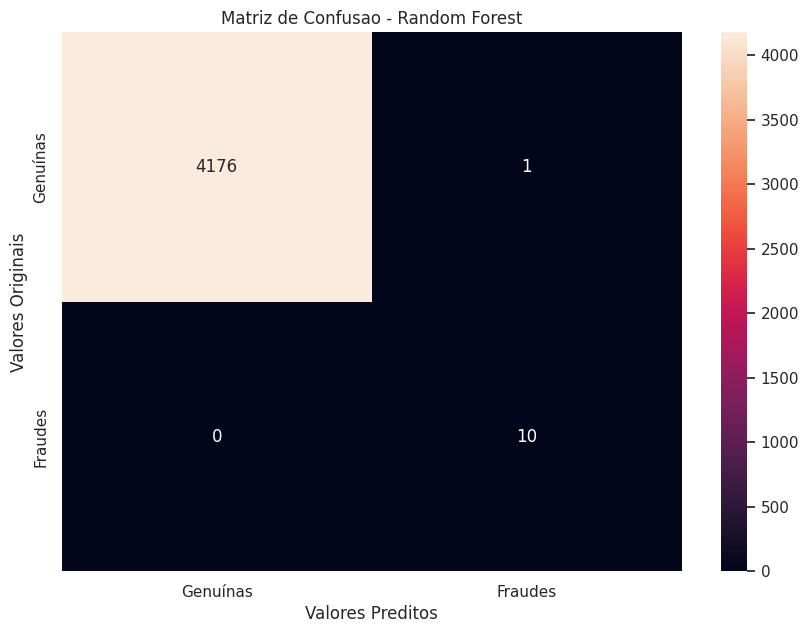

In [48]:
# Matriz de Confusão Random Forest
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Random Forest')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

# **Resultados: Ada Boost**

In [49]:
# Métricas de avaliação Ada Boost
metrics_ab = [['Acurácia',(accuracy_score(test_y, y_predictions_ab))],
                         ['Precision',precision_score(test_y, y_predictions_ab)],
                         ['Recall', recall_score(test_y, y_predictions_ab)],
                         ['F1_score',f1_score(test_y, y_predictions_ab)]]
metrics_df_ab = pd.DataFrame(metrics_ab, columns = ['Métricas', 'Resultados'])
metrics_df_ab

,Métricas,Resultados
0,Acurácia,0.998328
1,Precision,0.588235
2,Recall,1.000000
3,F1_score,0.740741


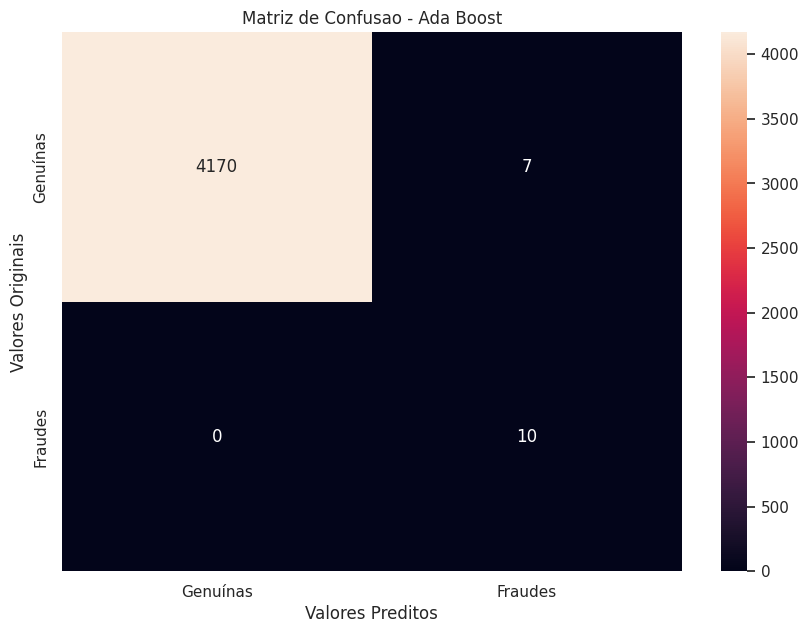

In [50]:
# Matriz de Confusão Ada Boost
confusion_matrix_ab = confusion_matrix(test_y, y_predictions_ab)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Ada Boost')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

# **Resultados: Decision Tree**

In [51]:
# Métricas de avaliação Decision Tree
metrics_df = [['Acurácia',(accuracy_score(test_y, y_predictions_dt))],
                         ['Precision',precision_score(test_y, y_predictions_dt)],
                         ['Recall', recall_score(test_y, y_predictions_dt)],
                         ['F1_score',f1_score(test_y, y_predictions_dt)]]
metrics_df_dt = pd.DataFrame(metrics_df, columns = ['Métricas', 'Resultados'])
metrics_df_dt

,Métricas,Resultados
0,Acurácia,0.997850
1,Precision,0.533333
2,Recall,0.800000
3,F1_score,0.640000


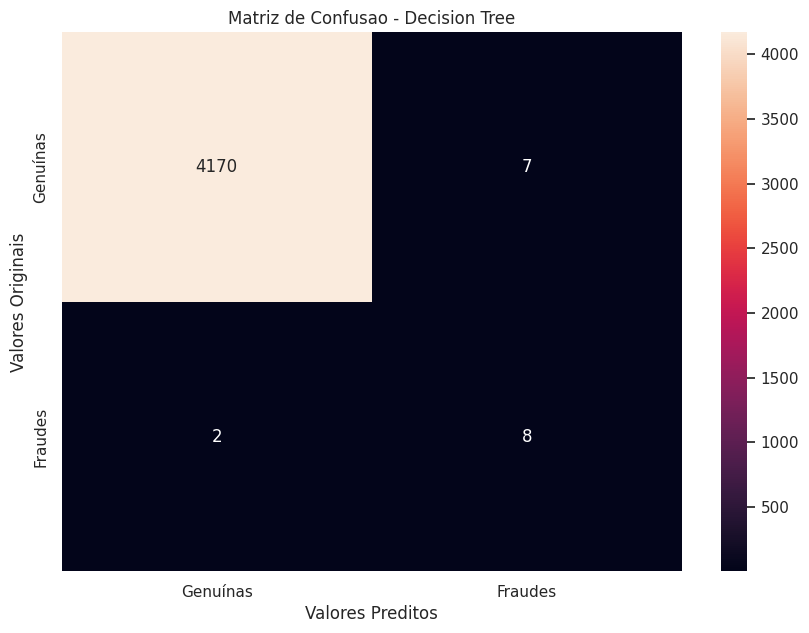

In [52]:
# Matriz de Confusão Decision Tree
confusion_matrix_dt = confusion_matrix(test_y, y_predictions_dt)
# Visualização
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_dt, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Decision Tree')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

# **Resultados: Gradient Boosting**

In [54]:
# Métricas de avaliação Gradient Boosting
metrics_gb = [['Acurácia',(accuracy_score(test_y, y_prediction_gb))],
                         ['Precision',precision_score(test_y, y_prediction_gb)],
                         ['Recall', recall_score(test_y, y_prediction_gb)],
                         ['F1_score',f1_score(test_y, y_prediction_gb)]]
metrics_df_gb = pd.DataFrame(metrics_gb, columns = ['Métricas', 'Resultados'])
metrics_df_gb

,Métricas,Resultados
0,Acurácia,0.998328
1,Precision,0.615385
2,Recall,0.800000
3,F1_score,0.695652


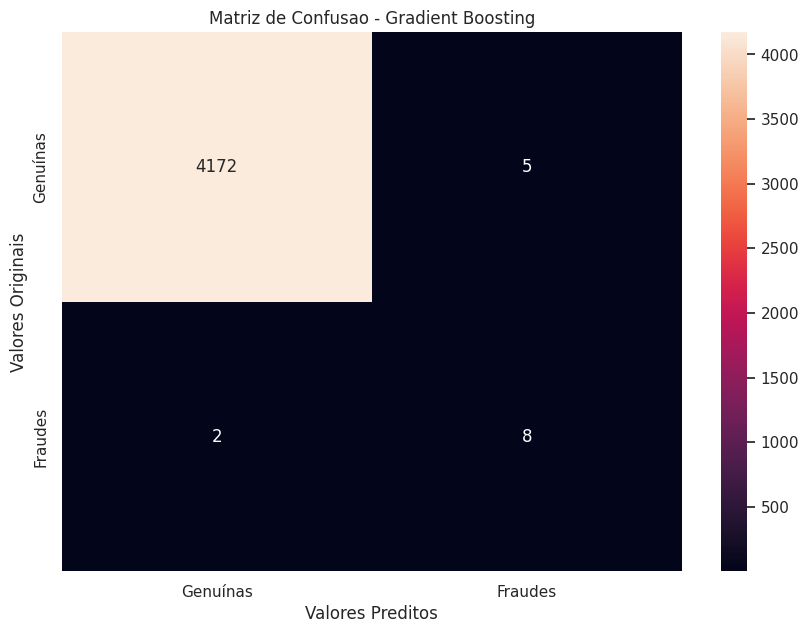

In [55]:
# Matriz de Confusão Gradient Boosting
confusion_matrix_gb = confusion_matrix(test_y, y_prediction_gb)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Valores Preditos')
ax.set_ylabel('Valores Originais')
ax.set_title('Matriz de Confusao - Gradient Boosting')
ax.xaxis.set_ticklabels(['Genuínas','Fraudes'])
ax.yaxis.set_ticklabels(['Genuínas','Fraudes'])
plt.show()

In [56]:
# Contando o número de transações genuínas e fraudulentas existem no conjunto de teste
test_y.value_counts()

0.0    4177
1.0      10
Name: Class, dtype: int64

Levando em conta que temos 160 transações fraudulentas no conjunto de teste e que nosso foco é a previsão de transações fraudulentas, notamos que o modelo que melhor atendeu a esse objetivo foi o Ada Boost. Este modelo previu corretamente 145 transações fraudulentas de 160, exibindo um recall de 90.60%, o qual foi o mais elevado entre todos os modelos avaliados.

In [57]:
# ROC Scores
from sklearn.metrics import roc_auc_score
print('Random Forest ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_rf) * 100).round(2))
print('Decision Tree ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_dt) *100).round(2))
print('Ada Boost ROC AUC Score: ', (roc_auc_score(test_y, y_predictions_ab) * 100).round(2))
print('Gradient Boost ROC AUC Score: ', (roc_auc_score(test_y, y_prediction_gb) * 100).round(2))

Random Forest ROC AUC Score:  99.99
Decision Tree ROC AUC Score:  89.92
Ada Boost ROC AUC Score:  99.92
Gradient Boost ROC AUC Score:  89.94



Quando lidamos com modelos de machine learning, é crucial ter uma compreensão clara dos objetivos que queremos alcançar e das informações que pretendemos extrair do modelo.

Neste projeto específico, nosso objetivo era desenvolver um modelo capaz de identificar transações fraudulentas com precisão. O modelo que mais se destacou nessa tarefa foi o Ada Boost, com um **Recall de 100%** e **Precisão de 90%**. Ele conseguiu identificar corretamente 10 transações fraudulentas em um conjunto de dados que continha 10 dessas transações.

É crucial considerar as ramificações de ter falsos positivos, especialmente devido ao potencial impacto adverso em clientes legítimos.

Diante desse cenário, é imperativo compreender o modelo de negócios e

1.   considerar as seguintes questões importantes:
2.   Deveríamos manter o algoritmo Random Forest, que demonstrou o melhor desempenho na detecção de transações fraudulentas, apesar de gerar vários falsos positivos?

Ou seria mais viável mudar para o Random Forest, que apresentou métricas sólidas de desempenho (recall de 100%) e classificou apenas 0,02% das transações genuínas como fraudulentas? No entanto, essa mudança também poderia resultar em um maior número de fraudes não detectadas.

Essas considerações, aliadas a um profundo entendimento do negócio e da abordagem desejada para soluções de machine learning, são fundamentais para o processo de tomada de decisão. Isso nos ajuda a determinar se estamos dispostos a aceitar um número maior de falsos positivos, desde que resulte em um modelo capaz de identificar o maior número possível de transações fraudulentas.

Agradeço a atenção e a oportunidade de contribuir para o projeto.

*Carlos Jozala*